<a href="https://colab.research.google.com/github/walkerjian/dev/blob/main/ClumpyMcNuggets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagine you are an ant that can crawl up, down, left or right on the matrix. Implement a search routine to optimise the maximum number of coins for the least amount of travel. At first do not traverse the edges of the matrix.

One possible approach to this problem is to use Depth-First Search (DFS) to explore all possible paths and keep track of the maximum number of coins collected. Since we also want to optimize for the least amount of travel, we can keep track of the path length for each amount of coins and choose the path with fewer steps if there are multiple paths with the same number of coins.

Below is a Python function that implements this approach:
This code uses recursion to explore every possible path and updates the best found path along the way. It assumes that the ant starts at the top left corner of the matrix and cannot pass through the edges. Since the question specifies "at first do not traverse the edges", this implementation only explores cells within those bounds.

In [16]:
def max_coins_with_least_travel(matrix):
    if not matrix or not matrix[0]:
        return 0, 0

    rows, cols = len(matrix), len(matrix[0])
    best_path = {'coins': 0, 'steps': float('inf')}  # Store the best path with coins and steps.

    def dfs(r, c, coins, steps):
        # Update the best path if this path has more coins or the same coins but fewer steps.
        if coins > best_path['coins'] or (coins == best_path['coins'] and steps < best_path['steps']):
            best_path['coins'] = coins
            best_path['steps'] = steps

        # Store the coin count of the current cell and mark the cell as visited by setting it to None.
        current_coins = matrix[r][c]
        matrix[r][c] = None

        # Explore all possible directions.
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # up, down, left, right
            new_r, new_c = r + dr, c + dc
            # Check bounds and if the cell has not been visited.
            if 0 <= new_r < rows and 0 <= new_c < cols and matrix[new_r][new_c] is not None:
                dfs(new_r, new_c, coins + matrix[new_r][new_c], steps + 1)

        # Backtrack: unmark the cell as visited for other paths to use it.
        matrix[r][c] = current_coins

    # Start DFS from (0, 0) assuming the ant starts at the top left corner.
    dfs(0, 0, matrix[0][0], 0)

    return best_path['coins'], best_path['steps']

# Example usage:
matrix = [
    [0, 3, 1, 1],
    [2, 0, 0, 4],
    [1, 5, 3, 1]
]

print(max_coins_with_least_travel(matrix))  # Output should be the maximum coins with least steps


(21, 9)


Scaling the previous solution to much larger matrices while using a brute-force DFS approach is not efficient due to its exponential time complexity. For larger matrices, we need to employ different strategies that could include memoization, dynamic programming, or even heuristic-based searches like A* or greedy best-first search. Since we are looking for both the maximum number of coins and the least amount of travel, a modified A* search with a heuristic that balances between coins collected and path length could be a good approach.

However, such heuristics might not always guarantee the shortest path or the maximum coins because they can lead to a locally optimal solution that is not globally optimal. So, for a more optimal solution, we can still use dynamic programming (DP) with a slight modification to keep track of the number of steps taken. This would mean storing additional information at each step of the DP table to make decisions based on both coins and path length.

Below is an approach using a DP table that stores the maximum number of coins that can be collected up to each cell, along with the number of steps taken to get there:

This DP approach fills out a table where each cell `(r, c)` contains a tuple of `(coins, steps)`, representing the maximum coins collected and the least steps taken to reach that cell. It only considers the previous cell from the left and above, as we're trying to find the path with the maximum coins for the least amount of travel, not necessarily to the bottom right corner.

Please note that this implementation may not be the most optimal in terms of the number of steps taken if we're considering paths that can go in any direction, as it's a greedy approach in terms of coins. Also, for very large matrices, space complexity can become an issue, and further optimization like space-optimized DP might be necessary.

I am picturing a very large matrix, with the coins indeed clustered into clumps of enhanced value, so it would make sense to create a graph or dictionary of the centroids of those rich clumps and organise them in order of 'weight' and in particular 'density' so as to concentrate the optimisation algorithm onto summing up the richest and densest clumps first

Given the scenario you are picturing — a large matrix with coins clustered into regions of high value — creating a representation that captures the locations and densities of these "rich clumps" is a strategic approach. The general idea would be to reduce the problem space from the entire matrix to a graph or dictionary representing these clumps, and then optimize the path between them. Here's a step-by-step strategy you might consider:

### Preprocessing Phase

1. **Clustering**:
   - Use a clustering algorithm like k-means to identify clusters of cells with high coin counts.
   - You may need to experiment with the number of clusters to best represent the clumps of coins.

2. **Calculating Centroids**:
   - For each cluster, calculate the centroid, which could be a simple average position of the cells within the cluster or a weighted average based on the number of coins in each cell.

3. **Evaluating Clump Weight and Density**:
   - **Weight**: The total number of coins in a cluster.
   - **Density**: The number of coins per unit area or per cell within the cluster.
   - Sort the clusters based on weight and density to prioritize the order in which they should be visited.

### Optimization Phase

1. **Graph Creation**:
   - Create a graph where each node represents a centroid of a coin clump.
   - Connect the nodes with edges that represent possible paths between them. The weights of the edges could represent the distance between nodes, potentially modified by the density of the coins, to prioritize paths through richer areas.

2. **Pathfinding**:
   - Apply a graph search algorithm like Dijkstra's or A* to find the optimal path through the graph that collects the most coins.
   - Incorporate heuristics that consider both the weight and density of the clumps to ensure that the path prioritizes areas with the highest return.

3. **Mapping Back to Matrix**:
   - Once the optimal path through the graph is found, map this path back onto the original matrix to determine the actual cells to traverse.
   - Adjust the path if necessary to ensure you can move only right or down within the constraints of the matrix.

### Postprocessing Phase

1. **Refinement**:
   - Use dynamic programming or greedy algorithms to refine the path within the clusters if needed. This might involve determining the best entry and exit points for each cluster to maximize coin collection.

2. **Verification**:
   - Verify that the path is valid within the constraints of the original problem (e.g., you only traverse each cell once).
   - Ensure that the path does not leave out any significant clusters that could potentially increase the total number of coins collected.

### Implementation Considerations

- **Scalability**: The algorithm needs to be efficient, as clustering and pathfinding in large matrices can be computationally intensive.
- **Clustering Sensitivity**: The results may be sensitive to the initial conditions and parameters used for clustering.
- **Accuracy vs. Speed**: There's a trade-off between the accuracy of the path optimization and the speed of computation. In some cases, it might be worthwhile to sacrifice some accuracy for faster results, especially with very large matrices.

By focusing the optimization algorithm on the richest and densest clumps first, you could significantly reduce the computational complexity compared to considering every cell in the matrix, and likely get a near-optimal solution much faster, especially in the case of very large matrices. This approach effectively turns a high-dimensional problem into a more manageable one by abstracting details and focusing on the most valuable areas.

In [ ]:
import numpy as np
from scipy import ndimage
from scipy.cluster.vq import kmeans2

def generate_sparse_matrix(size, clusters, cluster_size):
    matrix = np.zeros((size, size))
    for _ in range(clusters):
        # Randomly select a location for the cluster center
        cx, cy = np.random.randint(size, size=2)
        # Add coins around the center
        for _ in range(cluster_size):
            dx, dy = np.random.randint(-cluster_size, cluster_size, size=2)
            x, y = min(max(cx + dx, 0), size-1), min(max(cy + dy, 0), size-1)
            matrix[x, y] += np.random.randint(1, 10)  # Random coin value
    return matrix

def find_clusters(matrix, n_clusters):
    # Flatten the matrix and get the coordinates of non-zero values
    points = np.argwhere(matrix > 0)
    values = matrix[matrix > 0]
    centroids, labels = kmeans2(points, n_clusters, minit='points')
    return centroids, labels

def calculate_centroid_properties(matrix, centroids, labels):
    properties = []
    for i, centroid in enumerate(centroids):
        members = (labels == i)
        cluster_points = points[members]
        cluster_values = values[members]
        weight = cluster_values.sum()
        density = weight / len(cluster_points)
        centroid_coord = centroid
        properties.append((centroid_coord, weight, density))
    return properties

# Generate a 100x100 sparse matrix with 10 clusters, each with a size of 30
matrix = generate_sparse_matrix(100, 10, 30)

# Find clusters
centroids, labels = find_clusters(matrix, 10)

# Calculate properties for each centroid
properties = calculate_centroid_properties(matrix, centroids, labels)

# For now, we'll just print the properties
for prop in properties:
    print(f"Centroid at {prop[0]} with weight {prop[1]} and density {prop[2]}")

# TODO: Create graph, optimize path, and map back to matrix


You're absolutely right. Kriging is a geostatistical technique used for interpolating the value of a random field (like the distribution of minerals in the ground) at certain points based on measurements taken at other locations. Kriging uses the spatial correlation of the data to produce a statistically optimal estimate of the distribution, and it can be thought of as a form of 2D interpolation.

In the context of a matrix with coins, kriging could be used to interpolate and predict the number of coins in unvisited cells based on the values of nearby cells, assuming there is some spatial correlation in the placement of coins.

Applying kriging to the problem at hand involves a few steps:

1. **Modeling Spatial Correlation**: Determine the spatial autocorrelation of coin distribution in the matrix. This would involve calculating the semivariance between points at various distances.

2. **Fitting a Variogram**: The semivariance data is used to fit a variogram, which describes how semivariance changes with distance.

3. **Kriging Estimation**: Use the variogram to perform the kriging estimation, which will interpolate the data and estimate the distribution of coins in the matrix.

In Python, the PyKrige library is an option for performing kriging. Here's a basic example of how you could apply it to a matrix, similar to the matrix with coin distribution:

This code will estimate the coin distribution in the matrix based on the positions and values of coins in known locations. Kriging is particularly effective when you have a large matrix and only know the values at a subset of points (sparse data), and you want to estimate the values at the remaining points.

After the kriging estimation, you can then use the estimated distribution to inform the pathfinding algorithm, such as where to prioritize traveling in the matrix to maximize coin collection.

Keep in mind that kriging is computationally intensive, especially for larger datasets, so its efficiency will depend on the matrix size and the computational resources available. Additionally, the choice of the variogram model and parameters can significantly affect the quality of the estimation, so these should be tailored to the specific properties of the coin distribution.

In [ ]:
from pykrige.ok import OrdinaryKriging
import numpy as np

# Generate a sparse matrix with some random 'coin' placements
np.random.seed(42)
matrix_size = 100
coin_clusters = 10
coins_in_cluster = 100
matrix = np.zeros((matrix_size, matrix_size))

for _ in range(coin_clusters):
    cluster_center = np.random.randint(0, matrix_size, size=2)
    for _ in range(coins_in_cluster):
        cluster_point = cluster_center + np.random.randint(-5, 6, size=2)
        cluster_point = np.clip(cluster_point, 0, matrix_size-1)
        matrix[tuple(cluster_point)] += np.random.randint(1, 10)

# Coordinates where the 'coins' are known
x_known = np.argwhere(matrix > 0)[:, 1]
y_known = np.argwhere(matrix > 0)[:, 0]
z_known = matrix[matrix > 0]

# Create an Ordinary Kriging model with a spherical variogram model
OK = OrdinaryKriging(x_known, y_known, z_known, variogram_model='spherical',
                     verbose=False, enable_plotting=False)

# Predict the coin distribution on a grid
gridx = np.arange(0.0, matrix_size, 1)
gridy = np.arange(0.0, matrix_size, 1)
z_pred, ss = OK.execute('grid', gridx, gridy)

# z_pred now contains the kriging estimate of the matrix

# To visualize the result
import matplotlib.pyplot as plt

plt.imshow(z_pred, origin='lower')
plt.colorbar(label='Estimated Coins')
plt.title('Kriging Estimate of Coin Distribution')
plt.show()


Progressing:

That sounds like a solid approach. We can break it down into a series of steps to follow:

1. **Define the Test Matrix**: Create a test matrix that is sparse and includes clumps of coins with varying densities, including isolated 'nuggets'. This will serve as our testing ground.

2. **Cluster Detection with K-Means**: Apply k-means or a similar clustering algorithm to identify the locations of coin clumps. Adjust the algorithm to ensure it can detect small clumps and isolated points.

3. **Characterize Clusters with PCA**: Use Principal Component Analysis (PCA) to understand the distribution and orientation of these clumps, which can help in deciding how to navigate through them.

4. **Kriging**: Optional—Use kriging to estimate the potential value of unseen areas and to refine the coin distribution model within the clusters if the matrix is large enough to justify this step.

5. **Path Optimization**: Develop an algorithm to connect these clusters in a way that maximizes coin collection while minimizing traversal cost. This could start with a simple greedy algorithm and could be optimized further using more complex techniques like simulated annealing.

6. **Integration and Testing**: Combine all the components into a unified system and test it against the predefined matrix to ensure it's functioning as intended.

7. **Refinement with Simulated Annealing**: Use simulated annealing to refine the traversal path, possibly iterating over different temperature schedules to find an optimal solution.

8. **Final Testing and Optimization**: Test the complete system with different matrices to ensure robustness and optimize the algorithms for efficiency.

Here’s how we can start, assuming you have the relevant Python packages installed (`numpy`, `scipy`, `scikit-learn`, `matplotlib`):

This code snippet sets up the creation of a sparse matrix, inserts some clusters, and visualizes them. Then it applies K-Means to detect these clusters and PCA to characterize them. After this, you would develop the path optimization algorithm, possibly using greedy approaches, and later refine with more advanced techniques like simulated annealing.

For each step, especially steps 5 to 7, you would likely iterate on the design, testing various approaches to find the most effective and efficient solution given the problem's constraints.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

# Step 1: Define the Test Matrix
def create_test_matrix(size, num_clusters, sparse_ratio):
    matrix = np.zeros((size, size))
    points = []

    # Insert clumps of coins
    for _ in range(num_clusters):
        cluster_center = np.random.randint(0, size, 2)
        cluster_size = np.random.randint(1, 5)  # Small clumps
        for _ in range(cluster_size):
            point = cluster_center + np.random.randint(-1, 2, 2)
            point = np.clip(point, 0, size-1)
            matrix[tuple(point)] += np.random.randint(1, 100)  # Rich clumps
            points.append(point)

    # Insert sparse individual 'nuggets'
    for _ in range(int(size * size * sparse_ratio)):
        point = np.random.randint(0, size, 2)
        if matrix[tuple(point)] == 0:  # Ensure it's a new 'nugget'
            matrix[tuple(point)] = np.random.randint(1, 100)  # Isolated nuggets
            points.append(point)

    return matrix, np.array(points)

size = 100
num_clusters = 10
sparse_ratio = 0.01  # 1% of the matrix will have individual nuggets
matrix, points = create_test_matrix(size, num_clusters, sparse_ratio)

# Visualize the matrix
plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.show()

# Step 2: Cluster Detection with K-Means
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(points)

# Visualize clusters
for i in range(num_clusters):
    cluster_points = points[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.legend()
plt.show()

# Step 3: Characterize Clusters with PCA
# We will perform PCA on each cluster to determine their principal components
for i in range(num_clusters):
    cluster_points = points[clusters == i]
    pca = PCA(n_components=2)
    pca.fit(cluster_points)
    print(f"Cluster {i} PCA:", pca.components_)

# Steps 4-8 would follow...


Integrating kriging into the existing workflow involves estimating the distribution of coins in the test matrix. As mentioned before, kriging is useful if you have sparse observations and want to predict unobserved values. In this scenario, we'll use the locations of the coin clusters as known points and then predict the coin distribution in the rest of the matrix.

First, you need to install the necessary library for kriging. You can use `PyKrige`, which is a Python library for kriging. If you haven't installed `PyKrige` yet, you can install it using `pip`:

This code snippet defines a function to perform kriging using the coin locations and their corresponding values as inputs. It uses these to create a prediction for the entire matrix.

The `perform_kriging` function:

- Extracts the known points (where the coins are located) and their coin values from the matrix.
- Sets up an Ordinary Kriging model with a spherical variogram (a common default, but you may need to adjust this based on your data).
- Creates a grid that covers the entire matrix space.
- Uses the kriging model to predict the coin values at every point in the grid.
- The predicted values (`z_pred`) give an estimation of coin distribution throughout the matrix, which you can visualize.

After running kriging, you would use the predicted matrix to guide the pathfinding algorithm, prioritizing paths that traverse cells with higher predicted coin values. Integrating kriging provides a refined estimate of where the coins are likely to be, allowing for a more informed traversal strategy.

Please remember to adjust the kriging parameters based on the actual characteristics of your data for the best performance. For a real-world application, it might be necessary to perform cross-validation or use additional geostatistical analysis to choose the best variogram model and parameters.

In [ ]:
!pip install pykrige


In [ ]:
from pykrige.ok import OrdinaryKriging

# Step 4: Kriging
def perform_kriging(matrix, known_points):
    # Extract known points and their values
    values = [matrix[tuple(point)] for point in known_points]
    x_known, y_known = known_points[:, 0], known_points[:, 1]

    # Create the Ordinary Kriging model
    # Note: The variogram model here is assumed to be 'spherical'
    # This may need to be adjusted based on the actual distribution of the coin clusters
    OK_model = OrdinaryKriging(x_known, y_known, values, variogram_model='spherical')

    # Generate grid points for the prediction
    gridx = np.arange(0, matrix.shape[0], 1)
    gridy = np.arange(0, matrix.shape[1], 1)

    # Perform kriging on the defined grid
    z_pred, _ = OK_model.execute('grid', gridx, gridy)
    return z_pred

# Perform kriging on our matrix
predicted_matrix = perform_kriging(matrix, points)

# Visualize the kriged matrix
plt.imshow(predicted_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Kriging Predicted Coin Distribution')
plt.show()


In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


In [3]:
def greedy_path_between_points(matrix, start, end):
    """
    Find a greedy path between two points in a matrix, collecting coins along the way.

    :param matrix: A 2D numpy array representing the grid.
    :param start: A tuple (row, col) representing the start coordinate.
    :param end: A tuple (row, col) representing the end coordinate.
    :return: A list of tuples representing the path from start to end, and the total coins collected.
    """
    # Initialize the current position and path
    current_position = start
    path = [start]
    coins_collected = 0

    # Continue moving until the end position is reached
    while current_position != end:
        # Determine the next move based on the greedy algorithm (e.g., Manhattan distance)
        next_move = None
        if current_position[0] < end[0]:  # Move down
            next_move = (current_position[0] + 1, current_position[1])
        elif current_position[0] > end[0]:  # Move up
            next_move = (current_position[0] - 1, current_position[1])
        elif current_position[1] < end[1]:  # Move right
            next_move = (current_position[0], current_position[1] + 1)
        elif current_position[1] > end[1]:  # Move left
            next_move = (current_position[0], current_position[1] - 1)

        # Add the next move to the path and update the coins collected
        if next_move and matrix[next_move[0], next_move[1]] != 0:
            coins_collected += matrix[next_move[0], next_move[1]]
            matrix[next_move[0], next_move[1]] = 0  # Remove the coin from the matrix
        path.append(next_move)

        # Update the current position
        current_position = next_move

    return path, coins_collected


In [4]:
def greedy_path_from_point(matrix, start):
    """
    Generate a greedy path from a starting point to collect coins.

    :param matrix: A 2D numpy array representing the grid.
    :param start: A tuple (row, col) representing the start coordinate.
    :return: A list of tuples representing the path, and the total coins collected.
    """
    # Initialize the current position, path, and coins collected
    current_position = start
    path = [start]
    coins_collected = matrix[start[0], start[1]]
    matrix[start[0], start[1]] = 0  # Assume we collect coins at the start position

    # Function to find the next move based on the current position
    def find_next_move(pos):
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        best_move = None
        best_value = 0
        for direction in directions:
            next_pos = (pos[0] + direction[0], pos[1] + direction[1])
            if (0 <= next_pos[0] < matrix.shape[0] and
                0 <= next_pos[1] < matrix.shape[1] and
                matrix[next_pos[0], next_pos[1]] > best_value):
                best_value = matrix[next_pos[0], next_pos[1]]
                best_move = next_pos
        return best_move

    # Keep moving to the next best position until there are no more coins to collect
    next_move = find_next_move(current_position)
    while next_move:
        path.append(next_move)
        coins_collected += matrix[next_move[0], next_move[1]]
        matrix[next_move[0], next_move[1]] = 0  # Collect coins and update the matrix
        current_position = next_move
        next_move = find_next_move(current_position)

    return path, coins_collected


In [5]:
def integrated_system(matrix, num_clusters):
    # Perform K-Means clustering on the non-zero points in the matrix
    non_zero_points = np.argwhere(matrix > 0)
    if len(non_zero_points) < num_clusters:
        raise ValueError(f"Cannot have more clusters ({num_clusters}) than non-zero data points ({len(non_zero_points)}).")

    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(non_zero_points)
    cluster_centers = kmeans.cluster_centers_

    # Apply PCA to clusters to find their orientation (not used in the greedy path)
    pca_results = []
    for i in range(num_clusters):
        cluster_points = non_zero_points[kmeans.labels_ == i]
        pca = PCA(n_components=min(cluster_points.shape))
        pca.fit(cluster_points)
        pca_results.append(pca.components_)

    # Perform path optimization based on cluster centroids
    sorted_centroids = sorted(cluster_centers, key=lambda x: (x[0], x[1]))
    optimized_path = []
    coins_collected = 0
    current_position = (0, 0)  # Start at the top-left corner
    temp_matrix = matrix.copy()  # Create a copy of the matrix to not alter the original matrix

    # Visit each cluster by its centroid
    for centroid in sorted_centroids:
        # Find the path to the centroid from the current position
        # For simplicity, we go straight to the centroid, disregarding obstacles
        centroid = np.round(centroid).astype(int)
        subpath, subcoins = greedy_path_between_points(temp_matrix, current_position, tuple(centroid))
        optimized_path.extend(subpath)
        coins_collected += subcoins
        current_position = tuple(centroid)

    # Collect remaining coins with the greedy approach
    final_path, final_coins = greedy_path_from_point(temp_matrix, current_position)
    optimized_path.extend(final_path)
    coins_collected += final_coins

    return optimized_path, coins_collected


In [6]:
# Example matrix, replace with your actual matrix
matrix = np.array([
    [0, 1, 2, 3],
    [4, 0, 5, 0],
    [6, 0, 7, 8],
    [0, 9, 0, 10]
])

num_clusters = 3  # Replace with the number of clusters you wish to use


In [7]:
optimized_path, coins_collected = integrated_system(matrix.copy(), num_clusters)

# Print the optimized path and total coins collected
print(f"Optimized path: {optimized_path}")
print(f"Total coins collected: {coins_collected}")


Optimized path: [(0, 0), (0, 1), (0, 2), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 3), (3, 3)]
Total coins collected: 39


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


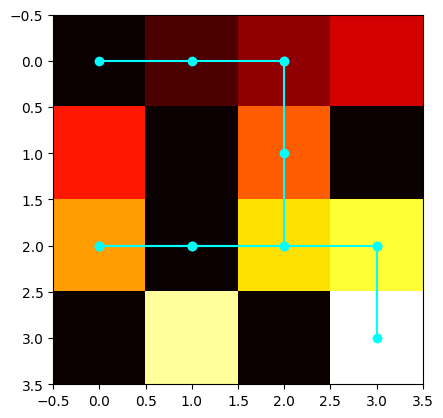

In [8]:
# Visualize the complete path
plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.plot([c for r, c in optimized_path], [r for r, c in optimized_path], marker='o', color='cyan')
plt.show()


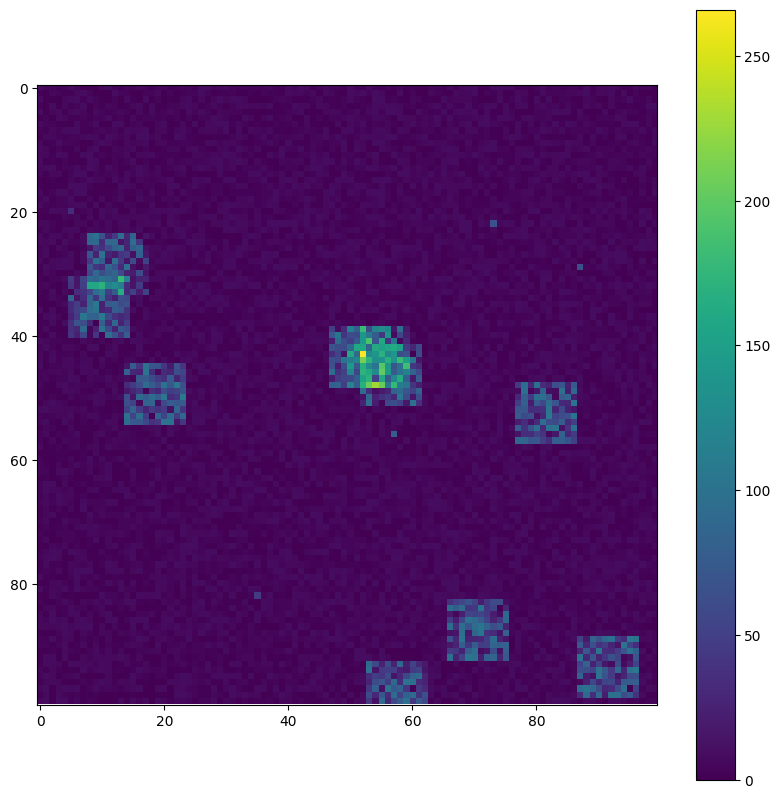

Collected 3692 coins.
Path taken: [(50, 50), (50, 51), (50, 52), (49, 52), (48, 52), (48, 53), (48, 54), (48, 55), (47, 55), (46, 55), (45, 55), (45, 56), (44, 56), (44, 57), (44, 58), (44, 59), (45, 59), (46, 59), (46, 58), (47, 58), (47, 57), (48, 57), (48, 56), (47, 56), (46, 56), (46, 57), (45, 57), (45, 58)]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a random matrix with clumps and rich nuggets
def generate_matrix_with_clumps(size, num_clumps, clump_size, nuggets, max_value):
    matrix = np.random.randint(0, 10, (size, size))  # Base coin distribution

    # Add clumps of coins
    for _ in range(num_clumps):
        clump_center = (np.random.randint(0, size), np.random.randint(0, size))
        for i in range(clump_center[0] - clump_size, clump_center[0] + clump_size):
            for j in range(clump_center[1] - clump_size, clump_center[1] + clump_size):
                if 0 <= i < size and 0 <= j < size:
                    matrix[i, j] += np.random.randint(0, max_value)

    # Add rich nuggets
    for _ in range(nuggets):
        nugget_position = (np.random.randint(0, size), np.random.randint(0, size))
        matrix[nugget_position] += np.random.randint(10, max_value)

    return matrix

# Visualize the matrix
def visualize_matrix(matrix):
    plt.figure(figsize=(10, 10))
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar()
    plt.show()

# Test harness
def test_greedy_path_from_point(matrix, start):
    path, coins_collected = greedy_path_from_point(matrix, start)
    print(f"Collected {coins_collected} coins.")
    print(f"Path taken: {path}")
    # Could add more tests, visualizations, or analyses here

# Parameters for matrix generation
size = 100
num_clumps = 10
clump_size = 5
nuggets = 5
max_value = 100

# Generate the matrix
test_matrix = generate_matrix_with_clumps(size, num_clumps, clump_size, nuggets, max_value)

# Visualize the generated matrix
visualize_matrix(test_matrix)

# Define a start position for the greedy path
start_position = (50, 50)  # This can be randomized or chosen based on specific criteria

# Run the test harness
test_greedy_path_from_point(test_matrix.copy(), start_position)


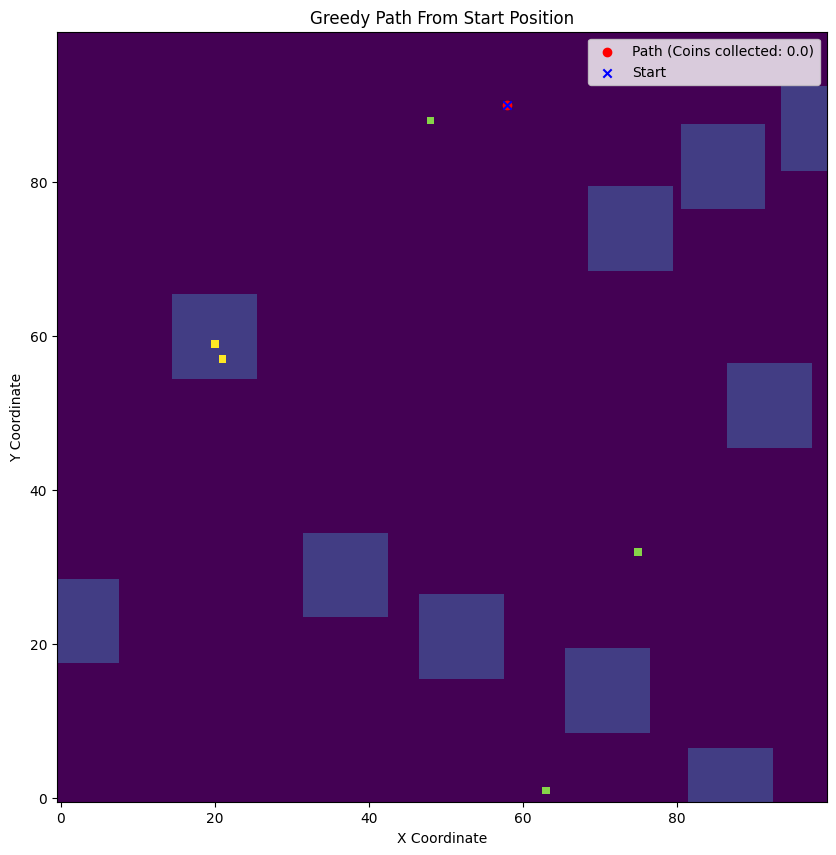

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the greedy_path_from_point function as provided earlier

# Generate a random matrix with default values
np.random.seed(42)  # For reproducibility
matrix = np.zeros((100, 100))

# Function to create clumps of coins
def create_clumps(matrix, num_clumps, clump_size, clump_value):
    for _ in range(num_clumps):
        # Randomly choose a center for the clump
        center_x = np.random.randint(0, matrix.shape[0])
        center_y = np.random.randint(0, matrix.shape[1])
        # Create a square clump around the center
        for i in range(-clump_size // 2, clump_size // 2 + 1):
            for j in range(-clump_size // 2, clump_size // 2 + 1):
                x = center_x + i
                y = center_y + j
                if 0 <= x < matrix.shape[0] and 0 <= y < matrix.shape[1]:
                    matrix[x, y] += clump_value

# Function to add rich nuggets
def add_rich_nuggets(matrix, num_nuggets, nugget_value):
    for _ in range(num_nuggets):
        x, y = np.random.randint(0, matrix.shape[0]), np.random.randint(0, matrix.shape[1])
        matrix[x, y] += nugget_value

# Create 10 clumps of coins, each of size 10x10 with a random value between 5 and 15
create_clumps(matrix, num_clumps=10, clump_size=10, clump_value=np.random.randint(5, 16))

# Add 5 rich nuggets with a value of 50 each
add_rich_nuggets(matrix, num_nuggets=5, nugget_value=50)

# Choose a random start position
start_position = (np.random.randint(0, 100), np.random.randint(0, 100))

# Run the greedy path finding algorithm
path, coins_collected = greedy_path_from_point(matrix.copy(), start_position)

# Visualize the path on the matrix
path_x, path_y = zip(*path)  # Unzip the list of tuples into two lists
plt.figure(figsize=(10, 10))
plt.imshow(matrix, cmap='viridis', origin='lower')
plt.scatter(path_y, path_x, c='red', label=f'Path (Coins collected: {coins_collected})')
plt.plot(path_y, path_x, c='red', linewidth=2)
plt.scatter(start_position[1], start_position[0], c='blue', marker='x', label='Start')
plt.legend()
plt.title('Greedy Path From Start Position')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


In [11]:
import numpy as np

# Define the matrix with size 100x100
matrix = np.zeros((100, 100))
# Assuming the greedy_path_from_point function and helper functions are already defined as per previous discussions

# Create 10 clumps of coins
create_clumps(matrix, num_clumps=10, clump_size=10, clump_value=np.random.randint(5, 16))

# Add 5 rich nuggets
add_rich_nuggets(matrix, num_nuggets=5, nugget_value=50)

# Choose the starting position as top-left corner
start_position = (0, 0)

# Find the greedy path
path, coins_collected = greedy_path_from_point(matrix, start_position)


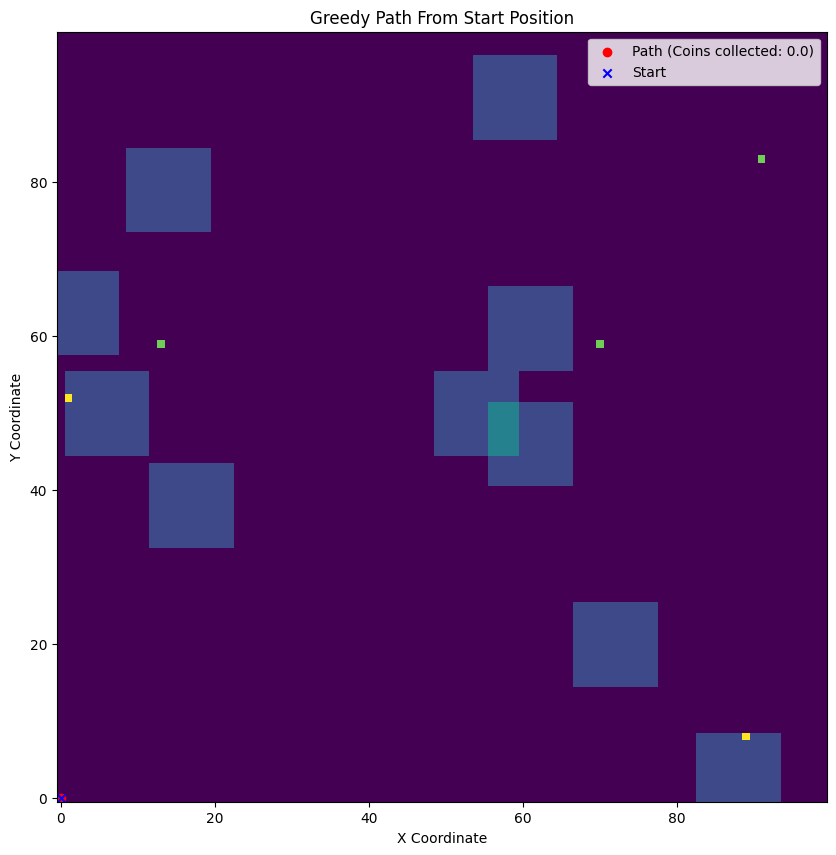

Path taken: [(0, 0)]
Total coins collected: 0.0


In [14]:
# Visualize the path on the matrix
path_x, path_y = zip(*path)  # Unzip the list of tuples into two lists
plt.figure(figsize=(10, 10))
plt.imshow(matrix, cmap='viridis', origin='lower')
plt.scatter(path_y, path_x, c='red', label=f'Path (Coins collected: {coins_collected})')
plt.plot(path_y, path_x, c='red', linewidth=2)
plt.scatter(start_position[1], start_position[0], c='blue', marker='x', label='Start')
plt.legend()
plt.title('Greedy Path From Start Position')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()
# Output the path and the total coins collected
print("Path taken:", path)
print("Total coins collected:", coins_collected)

In [13]:
# Output the path and the total coins collected
print("Path taken:", path)
print("Total coins collected:", coins_collected)

Path taken: [(0, 0)]
Total coins collected: 0.0


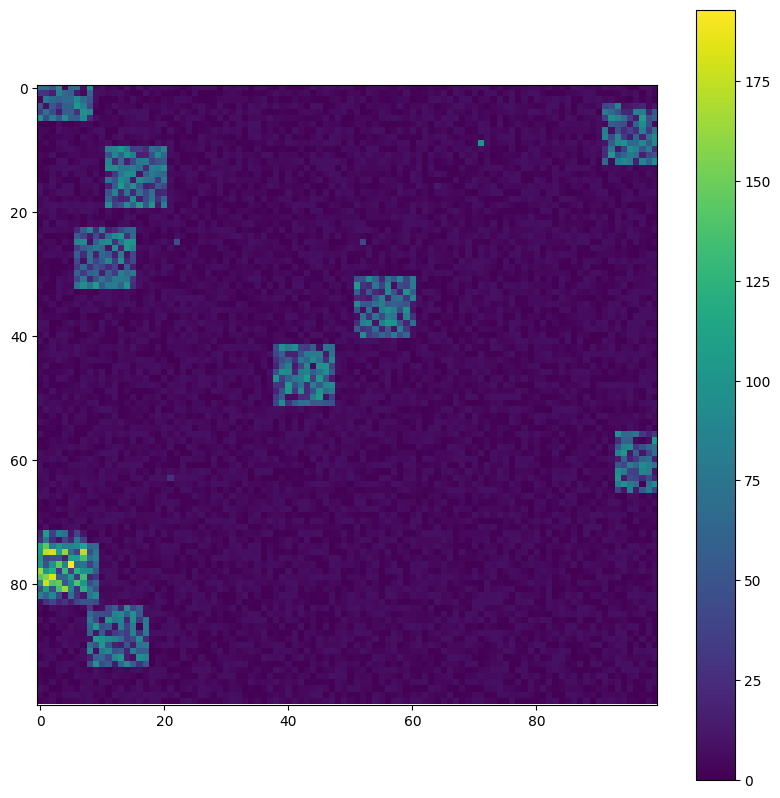

Collected 1927 coins.
Path taken: [(50, 50), (50, 51), (50, 52), (50, 53), (50, 54), (50, 55), (49, 55), (49, 56), (48, 56), (47, 56), (46, 56), (45, 56), (45, 55), (44, 55), (44, 56), (44, 57), (44, 58), (44, 59), (43, 59), (43, 58), (43, 57), (42, 57), (41, 57), (40, 57), (40, 56), (40, 55), (40, 54), (39, 54), (39, 53), (38, 53), (38, 52), (37, 52), (37, 53), (37, 54), (37, 55), (37, 56), (38, 56), (38, 57), (37, 57), (36, 57), (36, 56), (36, 55), (35, 55), (34, 55), (34, 54), (35, 54), (35, 53), (36, 53), (36, 54)]


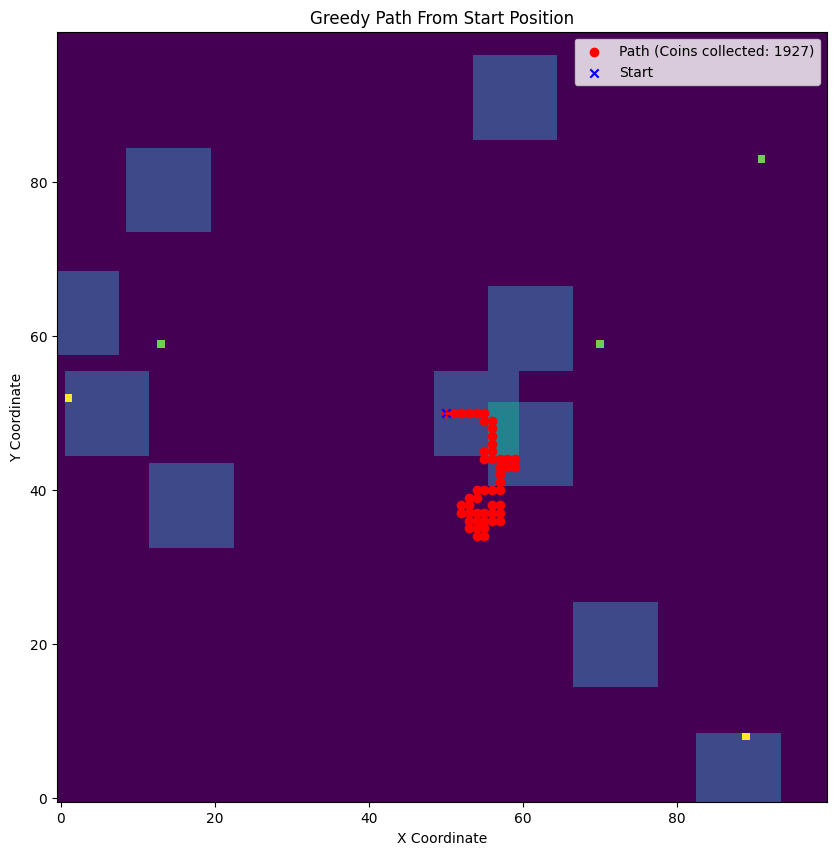

Path taken: [(50, 50), (50, 51), (50, 52), (50, 53), (50, 54), (50, 55), (49, 55), (49, 56), (48, 56), (47, 56), (46, 56), (45, 56), (45, 55), (44, 55), (44, 56), (44, 57), (44, 58), (44, 59), (43, 59), (43, 58), (43, 57), (42, 57), (41, 57), (40, 57), (40, 56), (40, 55), (40, 54), (39, 54), (39, 53), (38, 53), (38, 52), (37, 52), (37, 53), (37, 54), (37, 55), (37, 56), (38, 56), (38, 57), (37, 57), (36, 57), (36, 56), (36, 55), (35, 55), (34, 55), (34, 54), (35, 54), (35, 53), (36, 53), (36, 54)]
Total coins collected: 1927


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a random matrix with clumps and rich nuggets
def generate_matrix_with_clumps(size, num_clumps, clump_size, nuggets, max_value):
    matrix = np.random.randint(0, 10, (size, size))  # Base coin distribution

    # Add clumps of coins
    for _ in range(num_clumps):
        clump_center = (np.random.randint(0, size), np.random.randint(0, size))
        for i in range(clump_center[0] - clump_size, clump_center[0] + clump_size):
            for j in range(clump_center[1] - clump_size, clump_center[1] + clump_size):
                if 0 <= i < size and 0 <= j < size:
                    matrix[i, j] += np.random.randint(0, max_value)

    # Add rich nuggets
    for _ in range(nuggets):
        nugget_position = (np.random.randint(0, size), np.random.randint(0, size))
        matrix[nugget_position] += np.random.randint(10, max_value)

    return matrix

# Visualize the matrix
def visualize_matrix(matrix):
    plt.figure(figsize=(10, 10))
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar()
    plt.show()

# Test harness
def test_greedy_path_from_point(matrix, start):
    path, coins_collected = greedy_path_from_point(matrix, start)
    print(f"Collected {coins_collected} coins.")
    print(f"Path taken: {path}")
    # Could add more tests, visualizations, or analyses here

# Parameters for matrix generation
size = 100
num_clumps = 10
clump_size = 5
nuggets = 5
max_value = 100

# Generate the matrix
test_matrix = generate_matrix_with_clumps(size, num_clumps, clump_size, nuggets, max_value)

# Visualize the generated matrix
visualize_matrix(test_matrix)

# Define a start position for the greedy path
start_position = (50, 50)  # This can be randomized or chosen based on specific criteria

# Run the test harness
test_greedy_path_from_point(test_matrix.copy(), start_position)

# Find the greedy path
path, coins_collected = greedy_path_from_point(test_matrix.copy(), start_position)

# Visualize the path on the matrix
path_x, path_y = zip(*path)  # Unzip the list of tuples into two lists
plt.figure(figsize=(10, 10))
plt.imshow(matrix, cmap='viridis', origin='lower')
plt.scatter(path_y, path_x, c='red', label=f'Path (Coins collected: {coins_collected})')
plt.plot(path_y, path_x, c='red', linewidth=2)
plt.scatter(start_position[1], start_position[0], c='blue', marker='x', label='Start')
plt.legend()
plt.title('Greedy Path From Start Position')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()
# Output the path and the total coins collected
print("Path taken:", path)
print("Total coins collected:", coins_collected)